### Slope ($m$)

**Definition**

* **Rate of Change**: How much $y$ changes for a unit change in $x$.
* **Visual**: Determines the **steepness** and **direction** of the line.

**Mathematical Formula**

$$m = \frac{\text{Rise}}{\text{Run}} = \frac{\Delta y}{\Delta x}$$

* $\Delta y$: Change in vertical value ($y_2 - y_1$).
* $\Delta x$: Change in horizontal value ($x_2 - x_1$).

**Example Scenario: Bike Journey**

* **Context**: Measuring distance traveled over time.
* **Data**:
    * **$x$ (Time)**: $[0, 1, 2, 3, 4, 5, 6, 7]$ (hrs)
    * **$y$ (Distance)**: $[0, 35, 70, 85, 120, 150, 190, 250]$ (km)
* **Interpretation**:
    * **Slope**: Speed (km/hr).
    * **Calculation**: Between hours 1 and 2: $\frac{70-35}{2-1} = 35$ km/hr.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
time = np.array([0, 1, 2, 3, 4, 5, 6, 7])
distance = np.array([0, 35, 70, 85, 120, 150, 190, 250])

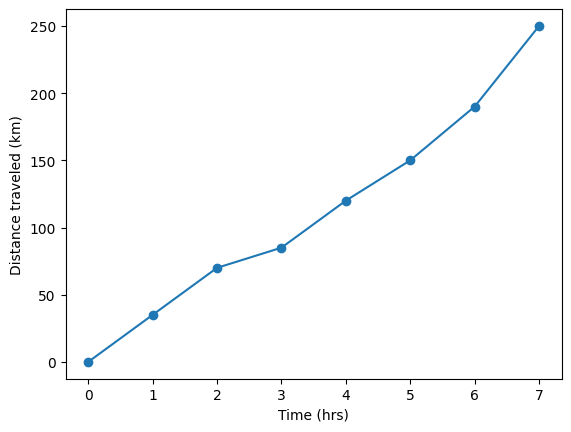

In [28]:
_ = plt.plot(time, distance)
_ = plt.scatter(time, distance)
_ = plt.xlabel('Time (hrs)')
_ = plt.ylabel('Distance traveled (km)')

### Slope and intercept of each line segment

And using that slope and intercept value to predict the distance for hour 8.

For line segment between sample 0 and 1
  Slope = 35/1 = 35.0
  Intercept = 0.0
  Predicted distance for hour 8: 280.0

For line segment between sample 1 and 2
  Slope = 35/1 = 35.0
  Intercept = 0.0
  Predicted distance for hour 8: 280.0

For line segment between sample 2 and 3
  Slope = 15/1 = 15.0
  Intercept = 40.0
  Predicted distance for hour 8: 160.0

For line segment between sample 3 and 4
  Slope = 35/1 = 35.0
  Intercept = -20.0
  Predicted distance for hour 8: 260.0

For line segment between sample 4 and 5
  Slope = 30/1 = 30.0
  Intercept = 0.0
  Predicted distance for hour 8: 240.0

For line segment between sample 5 and 6
  Slope = 40/1 = 40.0
  Intercept = -50.0
  Predicted distance for hour 8: 270.0

For line segment between sample 6 and 7
  Slope = 60/1 = 60.0
  Intercept = -170.0
  Predicted distance for hour 8: 310.0



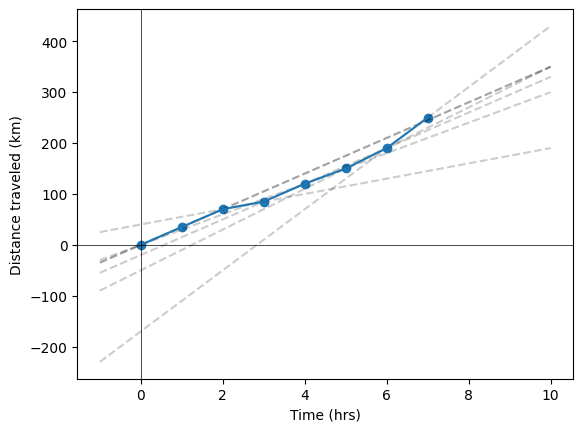

In [29]:
for i in range(len(time) - 1):
  x1, y1 = time[i], distance[i]
  x2, y2 = time[i+1], distance[i+1]

  print(f'For line segment between sample {i} and {i+1}')

  run = x2 - x1
  rise = y2 - y1
  slope = rise / run
  print(f'  Slope = {rise}/{run} = {slope}')

  # b = y - mx
  intercept = y1 - (slope * x1)
  print(f'  Intercept = {intercept}')

  # Predict for hour 8
  print(f'  Predicted distance for hour 8: {slope * 8 + intercept}\n')

  # Plot the line segment's projection
  x_plot = np.linspace(-1, 10, 100)
  y_plot = slope * x_plot + intercept
  _ = plt.plot(x_plot, y_plot, color='black', linestyle='--', alpha=0.2)

# Plot Data
_ = plt.plot(time, distance)
_ = plt.scatter(time, distance)
_ = plt.xlabel('Time (hrs)')
_ = plt.ylabel('Distance traveled (km)')

# Axis lines
_ = plt.axhline(0, color='black', linewidth=0.5)
_ = plt.axvline(0, color='black', linewidth=0.5)

### Using slope and intercept of each segment and making predictions for entire distance data

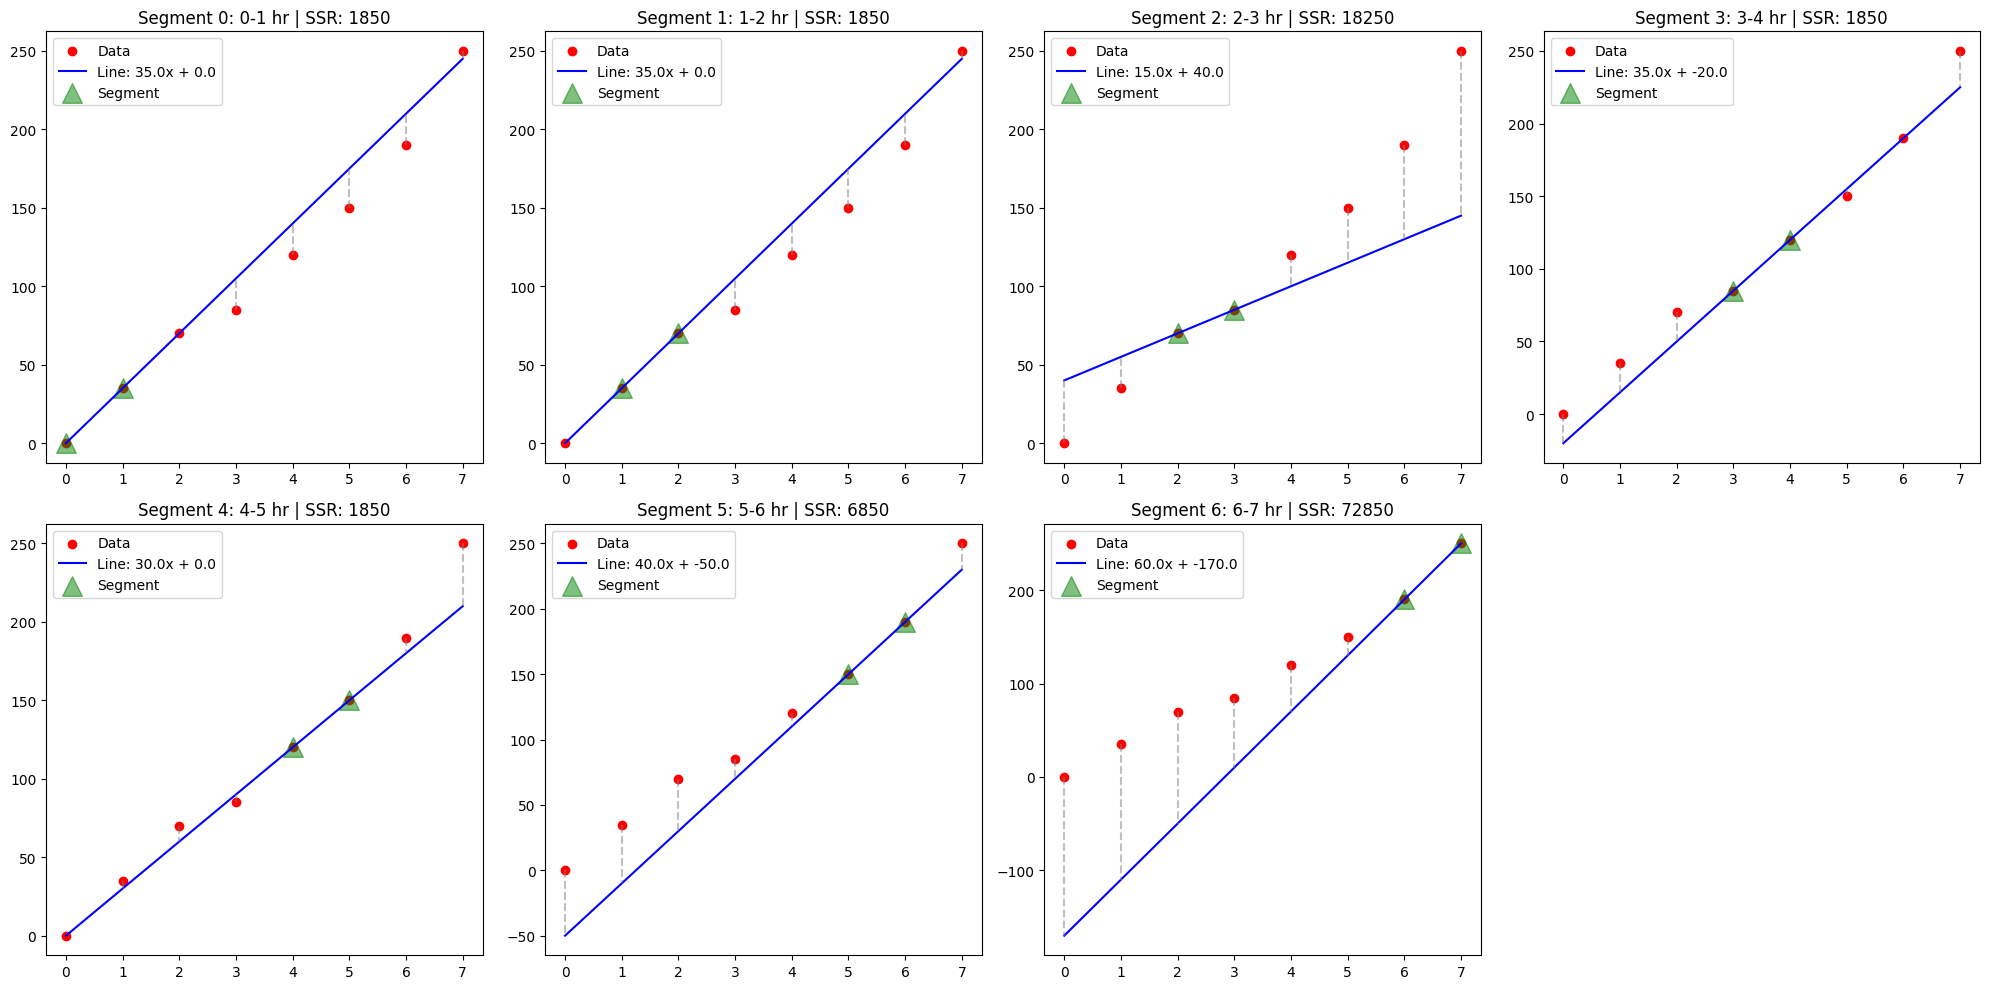

In [30]:
# Setup Grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Iterate over segments
for i in range(len(time) - 1):
  # Calc m, b
  x1, y1 = time[i], distance[i]
  x2, y2 = time[i+1], distance[i+1]

  m = (y2 - y1) / (x2 - x1)
  b = y1 - m * x1

  # Predict & SSR
  dist_pred = m * time + b
  ssr = np.sum((distance - dist_pred)**2)

  # Plot
  ax = axes[i]
  _ = ax.scatter(time, distance, color='red', label='Data')  # Data
  _ = ax.plot(time, dist_pred, color='blue',
              label=f'Line: {m:.1f}x + {b:.1f}')             # Regression Line
  _ = ax.vlines(time, distance, dist_pred, color='gray',
                linestyle='--', alpha=0.5)                   # Residuals
  _ = ax.scatter([x1, x2], [y1, y2], s=200, marker='^', color='green',
                 alpha=0.5, label='Segment')  # Segment Points

  _ = ax.set_title(f'Segment {i}: {x1}-{x2} hr | SSR: {ssr:.0f}')
  _ = ax.legend()

# Cleanup
for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()

### Find the best slope and intercept using OLS

Slope=33.33, Intercept=-4.17, SSR=933.33


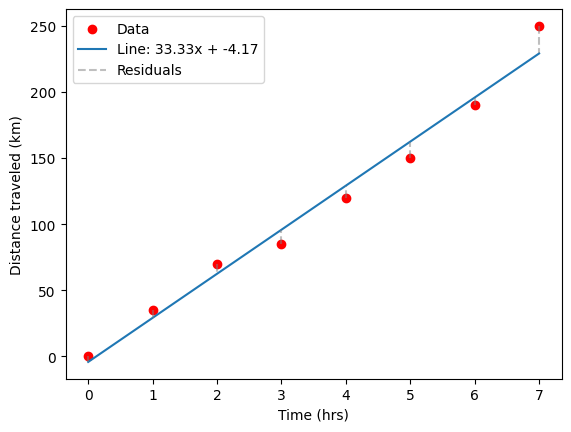

In [31]:
# Setup
x, y = time, distance

# OLS Calculation
x_mean, y_mean = x.mean(), y.mean()

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean)**2)

m = numerator / denominator
b = y_mean - (m * x_mean)

# Predict & SSR
y_pred = m * x + b
ssr = np.sum((y - y_pred)**2)

print(f'Slope={m:.2f}, Intercept={b:.2f}, SSR={ssr:.2f}')

# Plotting
_ = plt.scatter(x, y, color='red', label='Data')  # Data
_ = plt.plot(x, y_pred, label=f'Line: {m:.2f}x + {b:.2f}')  # Regression Line
_ = plt.vlines(x, y, y_pred, linestyle='--',
               color='gray', alpha=0.5, label='Residuals')  # Residuals
_ = plt.xlabel('Time (hrs)')
_ = plt.ylabel('Distance traveled (km)')
_ = plt.legend()